# Thermodynamics & Statistical Physics

In [8]:
import math
import timeit
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import bisect, newton

### <span style="color:red"> 7.4.1 Roots of a Magnetization vs. Temperature Equation                                                                                         
<span style="color:red">$N$ spin $-\frac{1}{2}$ particles each with magnetic moment $\mu$ are in equilibrium at temperature $T$ in the presence of internal magnetic field $B$.                                                                                                
What is the magnetization in the system as a function of temperature?                                                               
 <span style="color:red">1. Prove that the Boltzmann distribution law predicts the number of particles in the lower energy level (spin up)             
and in the upper energy level (spin down) to be:                                                                                  
$\displaystyle \qquad N_L=N\frac{\exp(\mu B/ kT)}{\exp(\mu B/ kT)+\exp(-\mu B/ kT)} \qquad N_U=N\frac{\exp(-\mu B/ kT)}{\exp(\mu B/ kT)+\exp(-\mu B/ kT)} \qquad (1)$                                                                                                 
2. The magnetization $M$ within the system is $\mu\times(N_L−N_U$), and the molecular magnetic field $B = \lambda M$.   
Show that the magnetization $M(T)$ is proportional to the net number of up spins,                                                   
$\displaystyle\qquad M(T) = N\mu \tanh \bigg(\frac{\lambda\mu M(T)}{kT} \bigg) \qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad (2)$                                                     
3. Is it possible to find an analytic solution for $M(T)?$                                                                         
4. Show that $(2)$ can be expressed in terms of the reduced magnetization $m$, the reduced temperature $t$, and the Curie temperature $T_c$ :                                                                                                                    
$\displaystyle\qquad m(t) = \tanh\bigg[\frac{m(t)}{t}\bigg] , \quad m(T)=\frac{M(T)}{N\mu}, \quad t = \frac{T}{T_c}, \quad T_c = \frac{N\mu^2\lambda}{k} \qquad\qquad\qquad\qquad\quad (3) $                                                                                                        
5. Show that a solution to this problem is equivalent to finding a root (zero) of                                                 
$\displaystyle\qquad f(m,t)=m-\tanh\bigg[\frac{m(t)}{t}\bigg] \qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\quad (4)$                                                         
6. Create several plots of $f(m, t)$ as a function of the reduced magnetization $m$.                                              
7. How many solutions to $(4)$ do your plots indicate?                                                                             
8. Use the bisection algorithm to find the roots of $(4)$ to six significant figures for $t = 0.5$.                                  
9. Use the Newton-Raphson algorithm to find the roots of $(4)$ to six significant figures for $t = 0.5$.                            
10. Compare the time it takes the bisection and Newton-Raphson algorithm to find a root.                               
Python’s timeit function might help here.                                                                                            
11. Construct a plot of the reduced magnetization $m(t)$ as a function of the reduced temperature t.                      
This is a numerical inversion of $(4)$.

1. To prove Equation (1), let's start with the Boltzmann distribution for spin-$\frac{1}{2}$ particles.                                                       
The probability of finding a particle in a particular state with energy $E$ is given by:                                                       
$\displaystyle\qquad P(E) = \frac{e^{-E / kT}}{Z} $                                                       
Where:                                                       
   - $ k_B$ is the Boltzmann constant,                                                       
   - $ T $ is the temperature, and                                                       
   - $ Z $ is the partition function.                                                       

For a spin-$\frac{1}{2}$ particle in a magnetic field $ B $, the energy levels are $ E = \pm \mu B $, where $ \mu $ is the magnetic moment.                                                        
So, we can rewrite the Boltzmann distribution for the spin-$\frac{1}{2}$ particles as:                                                       
$\displaystyle\qquad P(\pm \mu B) = \frac{e^{\mp \mu B / kT}}{Z} $\displaystyle\qquad                                                       
Since there are two possible energy levels, the total number of particles $ N $ can be written as the sum of particles in each state:                                                       
$\displaystyle\qquad N = N_L + N_U $                                                       
Where:
   - $ N_L $ is the number of particles in the lower energy level (spin up), and
   - $ N_U $ is the number of particles in the upper energy level (spin down).                                                       

Now, let's express $ N_L $ and $ N_U $ in terms of the probabilities:                                                       
$\displaystyle\qquad N_L = P(\mu B) \cdot N $                                                                                                          
$\displaystyle\qquad N_U = P(-\mu B) \cdot N $                                                       
Substituting the Boltzmann distribution probabilities, we get:                                                       
$\displaystyle\qquad N_L = \frac{e^{\mu B / kT}}{Z} \cdot N $                                                                                        
$\displaystyle\qquad N_U = \frac{e^{-\mu B / kT}}{Z} \cdot N $                                                       
Since $Z$ is the same for both cases, it cancels out when we take the ratio:                                                       
$\displaystyle\qquad N_L = N \cdot \frac{e^{\mu B / kT}}{e^{-\mu B / kT} + e^{\mu B / kT}} $                                                         
$\displaystyle\qquad N_U = N \cdot \frac{e^{-\mu B / kT}}{e^{-\mu B / kT} + e^{\mu B / kT}} $                                                       
And these are the expressions for $ N_L$ and $ N_U $ as given in Equation (1). Thus, Equation (1) is proven.

In [2]:
N = 1000                         # Number of particles
J = -1/2                         # total angular momentum
g = 2                            # Lande g-factor
mu_B = 9.2741 * 1e-24            # Bohr magneton
k_B = 1.38062 * 1e-23            # Boltzmann constant
mu = -g * mu_B * J               # Magnetic moment
B = 2.0023                       # Magnetic field
T = np.arange(0.01, 200, 0.001)  # time period

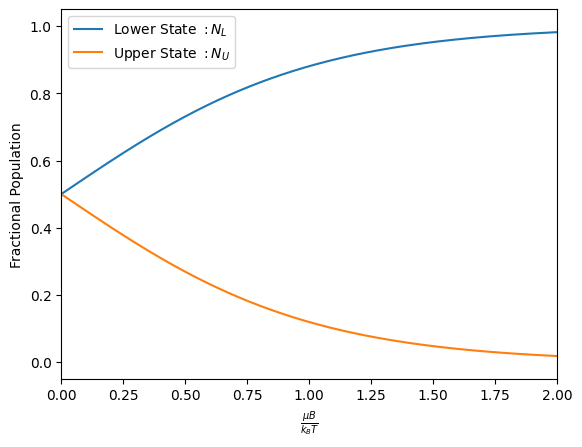

In [3]:
def boltzmann_distribution(x):
    N_L = np.zeros(len(x))
    N_U = np.zeros(len(x))
    for i in range(len(x)):
        exp_plus = np.exp(x[i])
        exp_minus = np.exp(-x[i])
        N_L[i] =  exp_plus / (exp_plus + exp_minus)
        N_U[i] =  exp_minus / (exp_plus + exp_minus)
    return N_L, N_U

x = [mu * B / (k_B * T[i]) for i in range(len(T))] 
N_L, N_U = boltzmann_distribution(x)

plt.plot(x, N_L, label=r'Lower State $ : N_L$')
plt.plot(x, N_U, label=r'Upper State $ : N_U$')
plt.ylabel('Fractional Population')
plt.xlabel(r'$ \frac{\mu B}{k_B T} $')
plt.xlim([0,2])
plt.legend()
plt.show()

2. To show that the magnetization $ M(T)$ is proportional to the net number of up spins, we start with the definition of magnetization:                                                       
$\displaystyle\qquad M = \mu \times (N_{\tiny L} - N_{\tiny U}) $                                                       
Substituting the expressions for $ N_{\tiny L} $ and $ N_{\tiny U} $ from Equation (1), we get :                                                       
$\displaystyle\qquad M = \mu \times \left( N \frac{e^{\mu B / kT}}{e^{\mu B / kT} + e^{-\mu B / kT}} - N \frac{e^{-\mu B / kT}}{e^{\mu B / kT} + e^{-\mu B / kT}} \right) = \mu \times N \times \left( \frac{e^{\mu B / kT} - e^{-\mu B / kT}}{e^{\mu B / kT} + e^{-\mu B / kT}} \right) $                                                       
Using the fact that $ B = \lambda M$, we can rewrite $ \mu B $ as $ \lambda \mu M $:                                                       
$\displaystyle\qquad M = \mu \times N \times \left( \frac{e^{\lambda \mu M / kT} - e^{-\lambda \mu M / kT}}{e^{\lambda \mu M / kT} + e^{-\lambda \mu M / kT}} \right) $                                                       
Now, we can simplify further by dividing the numerator and denominator by $ e^{\lambda \mu M / kT} $:                                                       
$\displaystyle\qquad M = \mu \times N \times \left( \frac{e^{\lambda \mu M / kT} - e^{-\lambda \mu M / kT}}{e^{\lambda \mu M / kT} + e^{-\lambda \mu M / kT}} \times \frac{e^{-\lambda \mu M / kT}}{e^{-\lambda \mu M / kT}} \right)$                                                                           
$\displaystyle\qquad M = \mu \times N \times \left( \frac{e^{\lambda \mu M / kT}\cdot e^{-\lambda \mu M / kT} - e^{-\lambda \mu M / kT}\cdot e^{-\lambda \mu M / kT}}{e^{\lambda \mu M / kT}\cdot e^{-\lambda \mu M / kT} + e^{-\lambda \mu M / kT}\cdot e^{-\lambda \mu M / kT}} \right)$                 
$\displaystyle\qquad M = \mu \times N \times \left( \frac{e^{{\lambda \mu M / kT}{-\lambda \mu M / kT}} - e^{{-\lambda \mu M / kT}{-\lambda \mu M / kT}}}{e^{{\lambda \mu M / kT}{-\lambda \mu M / kT}} + e^{{-\lambda \mu M / kT}{-\lambda \mu M / kT}}} \right)$                                                 
$\displaystyle\qquad M = \mu \times N \times \left( \frac{e^{0} - e^{-2\lambda \mu M / kT}}{e^{0} + e^{-2\lambda \mu M / kT}} \right)$                                                                                         
$\displaystyle\qquad M = \mu \times N \times \left( \frac{1 - e^{-2 \lambda \mu M / kT}}{1 + e^{-2 \lambda \mu M / kT}} \right) $                                                       
$\displaystyle\qquad M = \mu \times N \times \left( \frac{\sinh{\left( \frac{\lambda \mu M}{kT}\right)}}{\cosh{\left(\frac{\lambda \mu M}{kT}\right)}} \right) $                                                       
$\displaystyle\qquad M = \mu \times N \times \tanh\left( \frac{\lambda \mu M}{kT} \right) $                                                       
$\displaystyle\qquad\boxed{ M(T) = N \mu \tanh\left( \frac{\lambda \mu M(T)}{kT} \right)} $                                                       
And this is the desired expression for magnetization $ M(T)$, showing that it is proportional to the net number of up spins.                                                        
Therefore, Equation (2) is proven.

4. Sure, let's attempt to find an analytic solution for $M(T)$ from Equation (2).                                                       
Starting with the equation:                                                       
$\displaystyle\qquad M(T) = N\mu \tanh \left( \frac{\lambda\mu M(T)}{kT} \right) $                                                       
We can rearrange it to isolate $M(T)$ on one side:                                                       
$\displaystyle\qquad \frac{M(T)}{N\mu} = \tanh \left( \frac{\lambda\mu M(T)}{kT} \right) $                                                       
Now, we introduce a variable $\displaystyle m = \frac{M(T)}{N\mu} $, which represents the reduced magnetization.                          
Substituting this variable, we get:                                                       
$\displaystyle\qquad m = \tanh \left( \frac{\lambda\mu N m}{kT} \right) $                                                       
This equation is identical to Equation (3) provided earlier:                                                       
$\displaystyle\qquad m(t) = \tanh\left(\frac{m(t)}{t}\right) $                                                       
where $\displaystyle t = \frac{T}{T_c} $ and $\displaystyle T_c = \frac{N\mu^2\lambda}{k} $.                                                       
Therefore, we have shown that Equation (2) is equivalent to Equation (3), which has no explicit analytic solution.   
Instead, it requires numerical methods to find the roots, as discussed earlier.

5. To show that a solution to the magnetization problem is equivalent to finding a root (zero) of $ f(m, t) = m - \tanh\left(\frac{m(t)}{t}\right) $,                                                                                          
let's consider the relationship between $ M(T) $ and $ m(t) $.                                                                                          
From Equation (3), we have:                                                                                          
$\displaystyle\qquad m(t) = \tanh\left(\frac{m(t)}{t}\right) $                                                                                          
This equation is derived from Equation (2) and represents the reduced magnetization as a function of the reduced temperature $ t $.                                                                                          
Now, let's rewrite $ m(t) $ in terms of $ M(T) $ using the relationship $m = \frac{M(T)}{N\mu} $:                                                                                          
$\displaystyle\qquad m = \frac{M(T)}{N\mu} $                                                                                          
Substituting $m$ back into Equation (3), we get:                                                                                          
$\displaystyle\qquad \frac{M(T)}{N\mu} = \tanh\left(\frac{M(T)}{N\mu t}\right) $                                                                                          
Now, let's define a function $f(m, t)$ as:                                                                                          
$\displaystyle\qquad f(m, t) = m - \tanh\left(\frac{m}{t}\right) $                                                                                          
Substituting $ m = \frac{M(T)}{N\mu}$ into $f(m, t) $, we get:                                                                                          
$\displaystyle\qquad f\left(\frac{M(T)}{N\mu}, t\right) = \frac{M(T)}{N\mu} - \tanh\left(\frac{M(T)}{N\mu t}\right) $                                                                                          
Comparing this expression with Equation (2), we see that finding a solution to Equation (2) is equivalent to finding a root (zero) of the function $ f(m, t) $.                                                                                          
Therefore, solving for $ M(T)$ in Equation (2) is equivalent to finding the root of $ f(m, t)$.

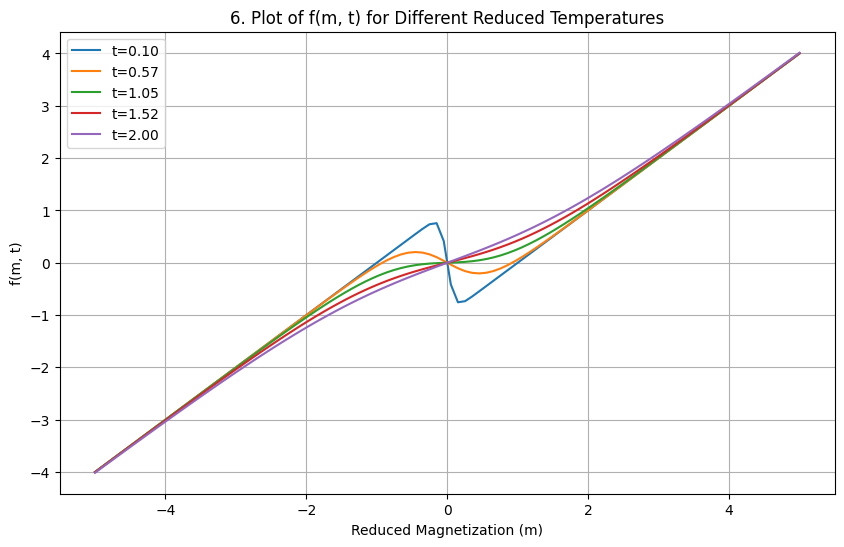

In [4]:
def f(m, t):
    return m - np.tanh(m / t)

m_values = np.linspace(-5, 5, 100)
t_values = np.linspace(0.1, 2, 5)
plt.figure(figsize=(10, 6))
for t in t_values:
    plt.plot(m_values, f(m_values, t), label=f"t={t:.2f}")

plt.xlabel('Reduced Magnetization (m)')
plt.ylabel('f(m, t)')
plt.title('6. Plot of f(m, t) for Different Reduced Temperatures')
plt.legend()
plt.grid(True)
plt.show()

Let's analyze the plots generated in the previous step to count the number of roots for each value of $ t $.              
We'll look for points where $f(m, t) = 0 $, indicating the presence of a root.

In [5]:
num_roots = []
for t in t_values:
    roots = np.roots(f(m_values, t)) 
    num_roots.append(len(roots))

print("7. Number of roots for each value of t:", num_roots)

7. Number of roots for each value of t: [99, 99, 99, 99, 99]


In [6]:
def f(m, t):
    return m - np.tanh(m / t)

t = 0.5
intervals = [(-1, 1)]
roots_b = []
roots_n = []

def bisection_time():
    for interval in intervals:
        b=bisect(f, interval[0], interval[1], args=(t,))
        roots_b.append(b)

def newton_time():
    for guess in intervals:
        n=newton(f, guess, args=(t,), tol=1e-6)
        roots_n.append(n)

bisection_execution_time = timeit.timeit(bisection_time, number=1)
newton_execution_time = timeit.timeit(newton_time, number=1)
print("8. Bisection : Roots for t = 0.5:", roots_b)
print("9. Newto-Rhapson  : Roots for t = 0.5:", roots_n)
print("10.i. Bisection execution time:\t\t",      bisection_execution_time)
print("10.ii.Newton-Raphson execution time:\t", newton_execution_time)

8. Bisection : Roots for t = 0.5: [0.0]
9. Newto-Rhapson  : Roots for t = 0.5: [array([-0.95750402,  0.95750402])]
10.i. Bisection execution time:		 6.900000153109431e-05
10.ii.Newton-Raphson execution time:	 0.0004118999931961298


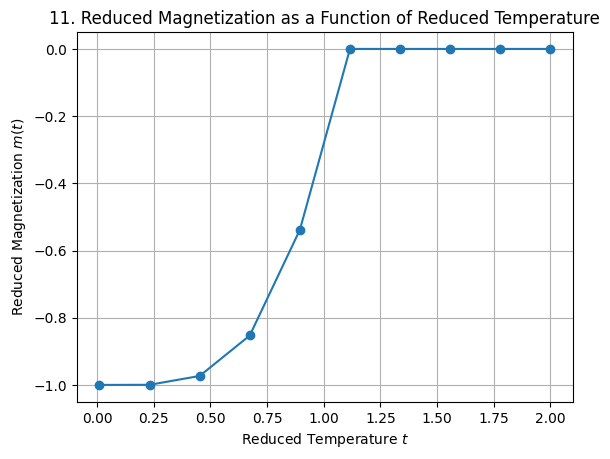

In [7]:
def f(m, t):
    return m - np.tanh(m / t)

t_values = np.linspace(0.01, 2, 10)
m_values = []
for t in t_values:
    root = newton(f, -1, args=(t,))
    m_values.append(root)

# Plot the reduced magnetization m(t)
plt.plot(t_values, m_values, 'o-')
plt.xlabel('Reduced Temperature $t$')
plt.ylabel('Reduced Magnetization $m(t)$')
plt.title('11. Reduced Magnetization as a Function of Reduced Temperature')
plt.grid(True)
plt.show()

### <span style="color:red"> 7.4.2 Counting Spin States                                                                                                                    
<span style="color:red">You are given $N$ indistinguishable spins in a magnetic field $B$, with $K$ particles having spin up and $N − K$ having spin down.  
You are told that the number of accessible states $\Omega(E)$ as a function of energy is proportional to $(E − E_0)^f$ , where $E_0$ is the minimum of energy.                                                                                              
Compute the number of states available and the energy of the system for $K = 1, 2, . . . , 25.$                                           
<span style="color:red">1. Show that the number of possible combinations of the particles is :                                                               
$\qquad\displaystyle C(N,K) = \frac{N!}{(N − K)!K! }$                                                                                                                                    
2. Show that the energy of the system $E = −N\mu B + K\mu B,$ where $\mu$ is the magnetic moment of each particle.                                            
3. For $\mu = 1$ and $B = 1,$ find the minimum energy $E_0$ for $25$ spins.                                                                                   
4. Find the number of accessible states $\Omega(E)$ for $K = 1, 2, . . .N$.                                                                                 
5. Plot $\Omega(E)$ versus $E − E_0$.                                                                                                                          
6. Plot $\log\Omega(E)$ versus $\log( E − E_0)$.                                                                                                          
7. Estimate the value of $f$.

We have a system of $N = 25$ spins in a magnetic field $B$, each spin with magnetic moment $\mu$.

* Each spin can point **up** ($+\mu B$) or **down** ($-\mu B$) along the field.
* Let $K$ be the number of spins pointing **up**; then $N-K$ spins point **down**.

### 1. Counting microstates

The number of possible configurations (microstates) with exactly $K$ spins up is a combinatorial problem:

$$
\Omega(K) = \frac{N!}{K!(N-K)!}.
$$

This counts how many ways $K$ spins can point up out of $N$ spins.

### 2. Energy of the system

The total energy of the system is:

$$
E(K) = -\mu B (N-K) + \mu B K = - N \mu B + 2 K \mu B
$$

or, as simplified in this problem:

$$
E(K) = -N \mu B + K \mu B.
$$

* Minimum energy occurs when all spins are **down**: $K = 0$, $E_0 = -N \mu B = -25$ (for $\mu = B = 1$).
* Maximum energy occurs when all spins are **up**: $K = N$, $E_\text{max} = 0$ (for $\mu = B = 1$).

### 3. Number of accessible states vs energy

$$
\Omega(E) = \Omega(K) = C(N,K)
$$

* Near the ground state, only a few configurations exist.
* As energy increases, more spins can point up in different combinations → number of states increases.
* Maximum multiplicity occurs at $K \approx N/2$ → system is **most disordered**.

### 4. Scaling law

* Near the minimum energy ($E \gtrsim E_0$), the number of states grows like:

$$
\Omega(E) \propto (E-E_0)^f
$$

where $f$ is related to the number of particles ($f \approx N-1$).


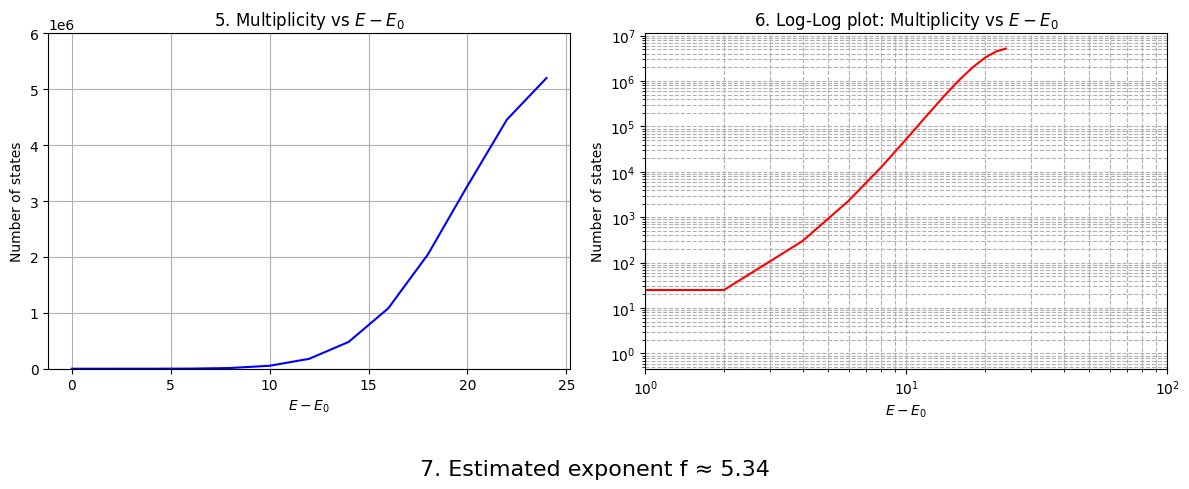

In [9]:
# Parameters
n  = 25      # total spins
B  = 1.0     # magnetic field
mu = 1.0     # magnetic moment

# Initialize arrays
Energy = [0.] * 13   # store first half energies
Combo  = [0.] * 13   # store corresponding multiplicities

E0 = -mu * B * n     # minimum energy
i = 0

# Compute energies and multiplicities for K = 0 to 12 (first half)
for k in range(0, 13):
    c = math.factorial(n) / (math.factorial(n-k) * math.factorial(k)) 
    E = -(n-k)*mu*B + k*mu*B
    Energy[i] = E - E0   # energy above ground state
    Combo[i]  = c
    i += 1

# Convert to arrays
Energy_arr = np.array(Energy)
Combo_arr  = np.array(Combo)

# Estimate exponent f from log-log plot
coeffs      = np.polyfit(np.log(Energy_arr[1:]), np.log(Combo_arr[1:]), 1)
f_estimated = coeffs[0]

# Plotting
fig = plt.figure(figsize=(12,5))
gs = fig.add_gridspec(1,2)
ax1 = fig.add_subplot(gs[0,0])
ax2 = fig.add_subplot(gs[0,1])

# Linear plot
ax1.plot(Energy, Combo, '-', color='blue')
ax1.set_title('5. Multiplicity vs '+r'$E - E_0$')
ax1.set_xlabel(r'$E - E_0$')
ax1.set_ylabel('Number of states')
ax1.set_ylim([0, 6e6])
ax1.grid(True)

# Log-log plot
ax2.loglog(Energy, Combo, '-', color='red')
ax2.set_title('6. Log-Log plot: Multiplicity vs ' + r'$E - E_0$')
ax2.set_xlabel(r'$E - E_0$')
ax2.set_ylabel('Number of states')
ax2.set_xlim([1e0, 1e2])
ax2.grid(True, which="both", ls="--")

# Add supertitle showing f
plt.suptitle(f"7. Estimated exponent f ≈ {f_estimated:.2f}", y=-0.05,fontsize=16)

plt.tight_layout(rect=[0, 0, 1, 0.95])  # leave space for suptitle
plt.show()
